# Project-2: EDA 

Exploratory Data Analysis (EDA) delves into the data's depths, revealing its underlying patterns and connections.
- EDA is an initial exploration to grasp the data's nuances.
- It helps us to understan the different facets of the dataset.

1. Import the data
    - You can import data from a local computer, website, or using an API like yfinance.
    - You can also use some built-in datasets.
    - You can import Excel or CSV files.

2. Explore the Data
    - You can use the methods *head(), tail(), columns, index, info(), describe()*.

3. Cleaning and refining the data:
    - Check data types using info().
        - If a numerical feature is given as a string, do conversion.
        - If a date feature is given as a string, do conversion.
    - You can change the column or row labels.
        - You can use rename() to change column or row labels.
        - You can use reset_index() or set_index() to change indexes or row labels.
    - Rectifying missing values.
        - You can use *info(), isnull() or notnull()* to detect missing values.
        - You can either drop or fill the missing values.
            - Drop rows or columns with missing values.
        - Fill in the missing values.
            - You can fill it with a constant value or the mean/median of the column.
            - You can use imputation methods.
    - Eliminating duplications.
        - You can use *duplicate()* to determine repeated rows.
        - You can either drop the repetitions or keep them.
        - You can use *drop_duplicates()* to remove repetitions.
    - Filtering out extraneous noise.
    - Spotting and rectifying anomalies and outliers.
        - You can either remove them or keep them.
        - You can use different definitions of outliers.
            - One method is using the interquartile range (IQR).
    - Removing redundancies.
        - Drop the columns which do not provide useful information.
    - Scaling Data
        - If the scales of featues are different, it might be a good idea to change their scale to the same level.
        - You can use *StandardScaler()* or *MinMaxScaler()*.

4. Statistical Tools
    - Utilize statistical tools and graphs to derive insights from the data.
    - Uncovering significant features and interrelations among them.
    - You can find correlations between features using the method *corr()*.
    - You can display it using *sns.heatmap()*.

5. Visualization
    - Utilize graphs to derive insights from the data.
    - You can use line plots, scatter plots, histograms, pie charts, pair plots.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

## Import Data

In [2]:
amazon = yf.Ticker('AMZN').history(start='2000-01-01', end='2020-12-31').iloc[:,:-2]
amazon.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03 00:00:00-05:00,4.075000,4.478125,3.952344,4.468750,322352000
2000-01-04 00:00:00-05:00,4.268750,4.575000,4.087500,4.096875,349748000
2000-01-05 00:00:00-05:00,3.525000,3.756250,3.400000,3.487500,769148000
2000-01-06 00:00:00-05:00,3.565625,3.634375,3.200000,3.278125,375040000
2000-01-07 00:00:00-05:00,3.350000,3.525000,3.309375,3.478125,210108000


In [3]:
import pandas as pd
amazon.reset_index(inplace=True)
amazon.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-03 00:00:00-05:00,4.075000,4.478125,3.952344,4.468750,322352000
1,2000-01-04 00:00:00-05:00,4.268750,4.575000,4.087500,4.096875,349748000
2,2000-01-05 00:00:00-05:00,3.525000,3.756250,3.400000,3.487500,769148000
3,2000-01-06 00:00:00-05:00,3.565625,3.634375,3.200000,3.278125,375040000
4,2000-01-07 00:00:00-05:00,3.350000,3.525000,3.309375,3.478125,210108000


In [4]:
# year column
amazon['Year'] = amazon['Date'].dt.year
amazon.head()

,Date,Open,High,Low,Close,Volume,Year
0,2000-01-03 00:00:00-05:00,4.075000,4.478125,3.952344,4.468750,322352000,2000
1,2000-01-04 00:00:00-05:00,4.268750,4.575000,4.087500,4.096875,349748000,2000
2,2000-01-05 00:00:00-05:00,3.525000,3.756250,3.400000,3.487500,769148000,2000
3,2000-01-06 00:00:00-05:00,3.565625,3.634375,3.200000,3.278125,375040000,2000
4,2000-01-07 00:00:00-05:00,3.350000,3.525000,3.309375,3.478125,210108000,2000


In [5]:
# remove times from the values in 'Date' column
amazon['Date'] = pd.to_datetime(amazon['Date'].dt.date)
amazon.head()

,Date,Open,High,Low,Close,Volume,Year
0,2000-01-03,4.075000,4.478125,3.952344,4.468750,322352000,2000
1,2000-01-04,4.268750,4.575000,4.087500,4.096875,349748000,2000
2,2000-01-05,3.525000,3.756250,3.400000,3.487500,769148000,2000
3,2000-01-06,3.565625,3.634375,3.200000,3.278125,375040000,2000
4,2000-01-07,3.350000,3.525000,3.309375,3.478125,210108000,2000


### info()
Offers a rapid overview of the data.
- It highlights the count of null values and data types, which are crucial.
- Numeric columns might be represented as strings.
- Date columns might also be represented as strings

In [6]:
# data types and non-null values 
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5283 non-null   datetime64[ns]
 1   Open    5283 non-null   float64       
 2   High    5283 non-null   float64       
 3   Low     5283 non-null   float64       
 4   Close   5283 non-null   float64       
 5   Volume  5283 non-null   int64         
 6   Year    5283 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1)
memory usage: 268.4 KB


- Every entry in the dataset is non-null.
- The dataset contains 5283 entries starting from the second line.
- Each column in the table exhibits 5283 non-null values, indicating a complete absence of null values throughout.

### describe()
- descriptive statistics
- summary of the numerical columns

In [7]:
# no need for 'Date' column
amazon.iloc[:,1:].describe()

,Open,High,Low,Close,Volume,Year
count,5283.000000,5283.000000,5283.000000,5283.000000,5.283000e+03,5283.000000
mean,23.582134,23.844155,23.289423,23.578918,1.294681e+08,2010.004164
std,35.852839,36.246389,35.389415,35.831425,1.022360e+08,6.053746
min,0.295500,0.305000,0.275500,0.298500,1.762600e+07,2000.000000
25%,2.076250,2.127813,2.045000,2.084250,7.249300e+07,2005.000000
50%,6.696500,6.800000,6.602500,6.701500,1.070500e+08,2010.000000
75%,26.727501,26.972000,26.343000,26.696250,1.544710e+08,2015.000000
max,177.350006,177.612503,174.334503,176.572495,2.086584e+09,2020.000000


### missing values

In [8]:
amazon.isnull().head()

,Date,Open,High,Low,Close,Volume,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [9]:
amazon.isnull().head()

,Date,Open,High,Low,Close,Volume,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [10]:
# no missing values in each column
amazon.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Year      0
dtype: int64

In [11]:
# non-null values
amazon.notnull().head()

,Date,Open,High,Low,Close,Volume,Year
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True


## Close

In [12]:
df = amazon[['Date', 'Close', 'Year']].copy()
df.head()

,Date,Close,Year
0,2000-01-03,4.468750,2000
1,2000-01-04,4.096875,2000
2,2000-01-05,3.487500,2000
3,2000-01-06,3.278125,2000
4,2000-01-07,3.478125,2000


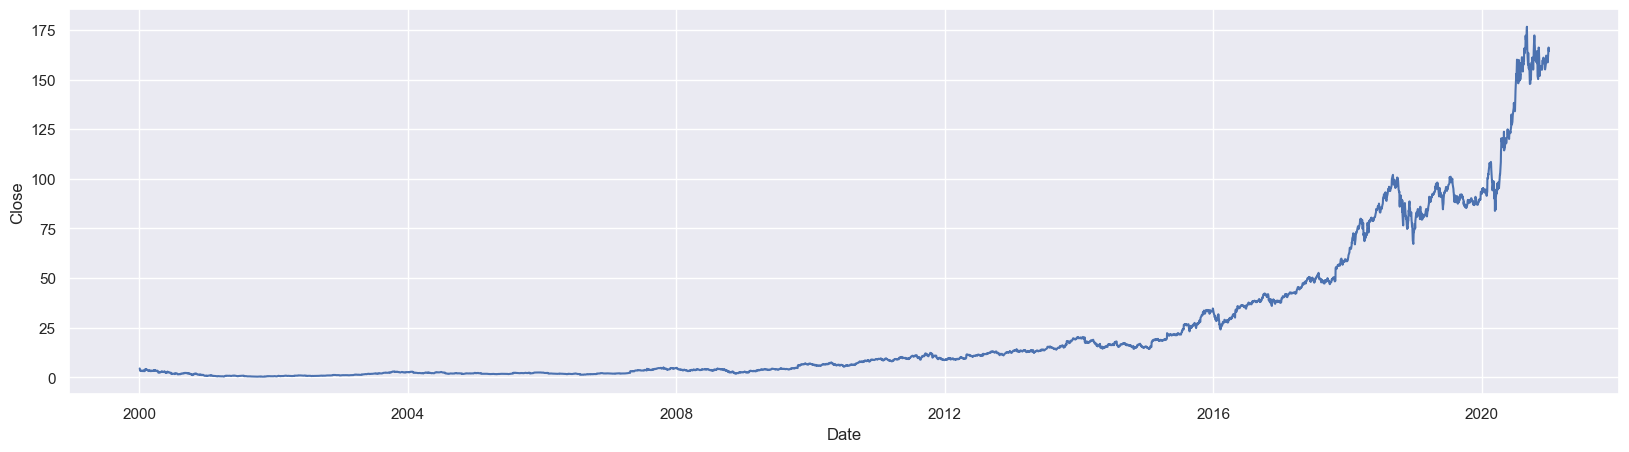

In [13]:
sns.set_theme()     # change the theme
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Close', data=df);

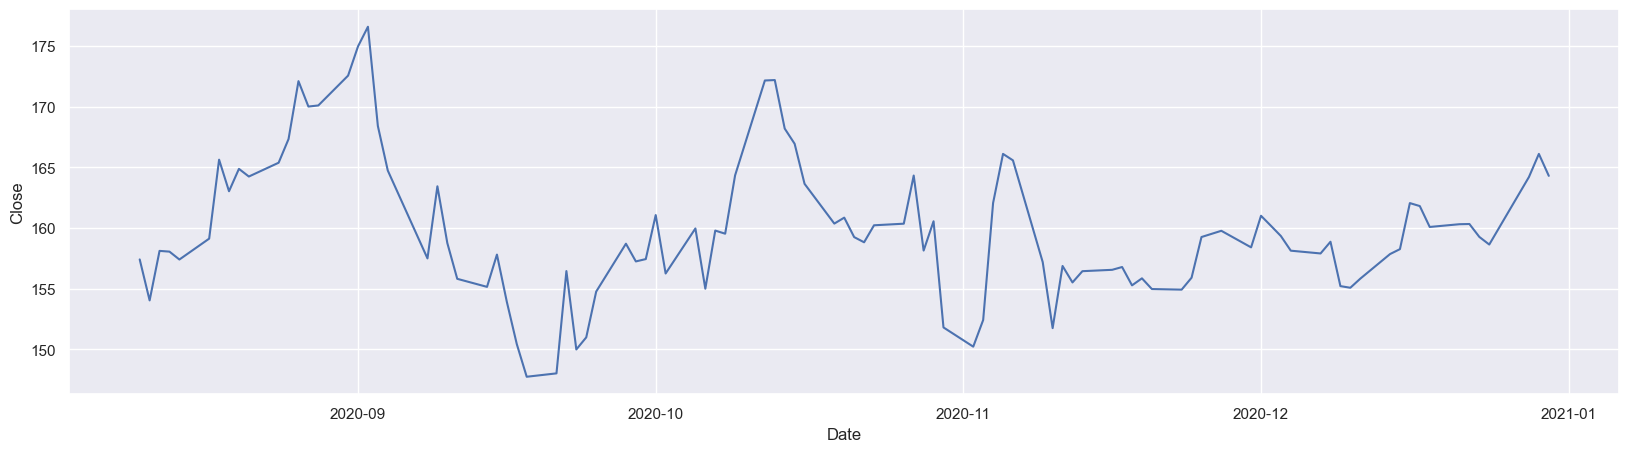

In [15]:
# last 100 rows
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Close', data=df.iloc[-100:,:]);

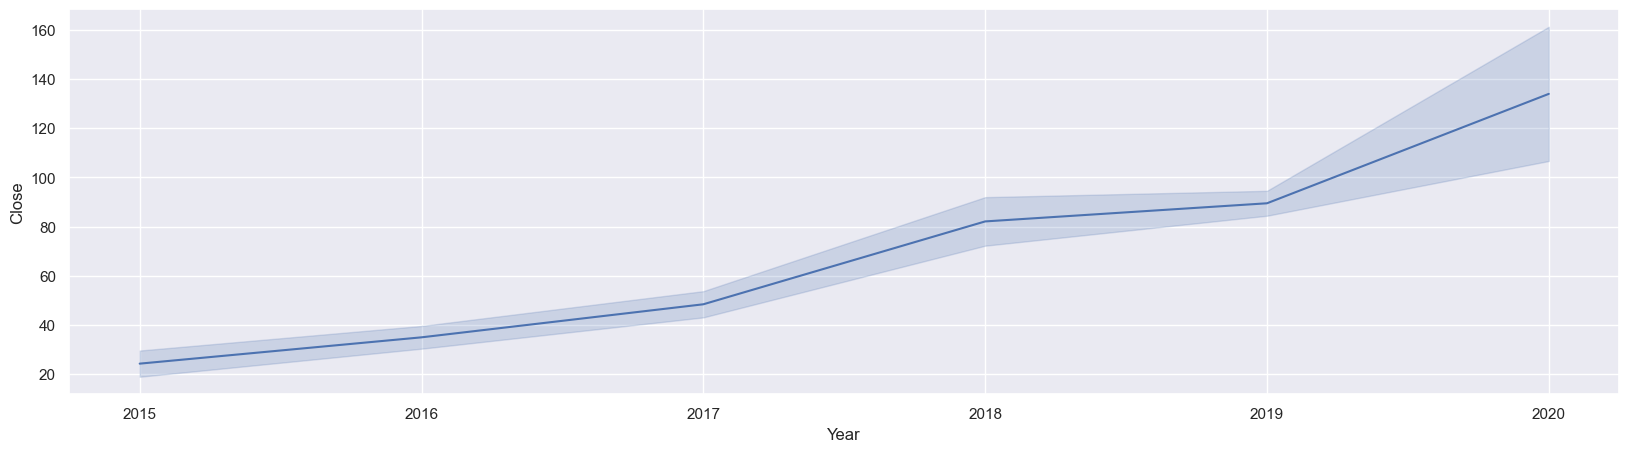

In [50]:
# error bars at +/- 1 sd around the mean
plt.figure(figsize=(20,5))
sns.lineplot(x='Year', y='Close', data=df.iloc[-1500:,:], errorbar='sd');

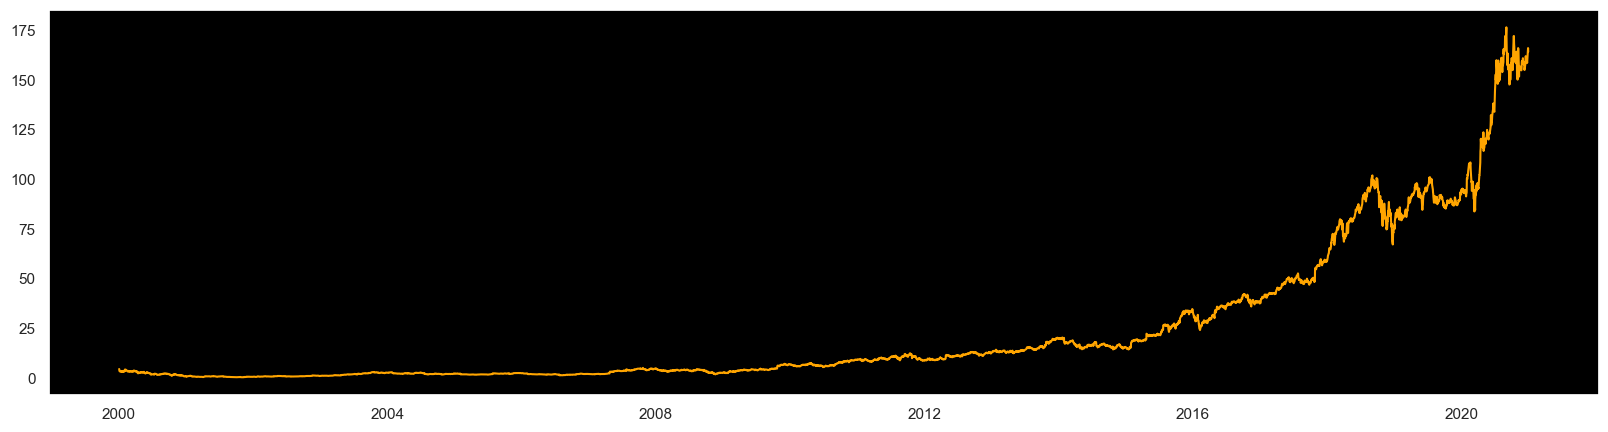

In [57]:
plt.figure(figsize=(20,5))
plt.axes().set_facecolor('black');
plt.plot(df['Date'], df['Close'], color='orange')
plt.grid(visible=False);

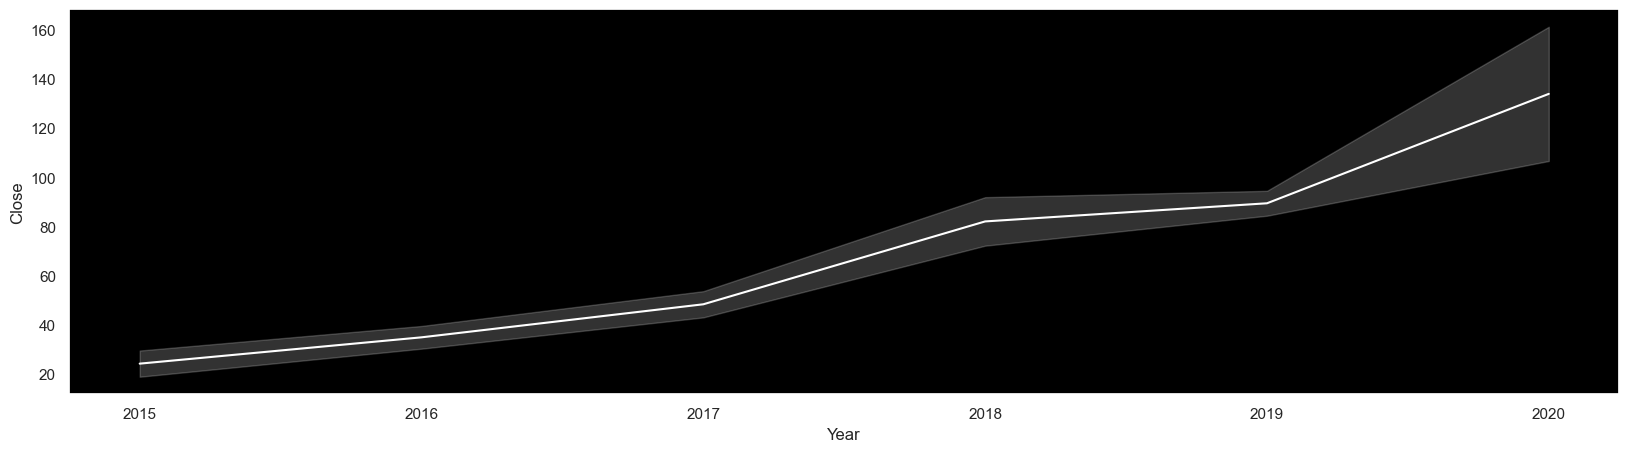

In [56]:
# error bars at +/- 1 sd around the mean
plt.figure(figsize=(20,5))
plt.axes().set_facecolor('black');
sns.lineplot(x='Year', y='Close', data=df.iloc[-1500:,:], errorbar='sd', color='white')
plt.grid(visible=False);

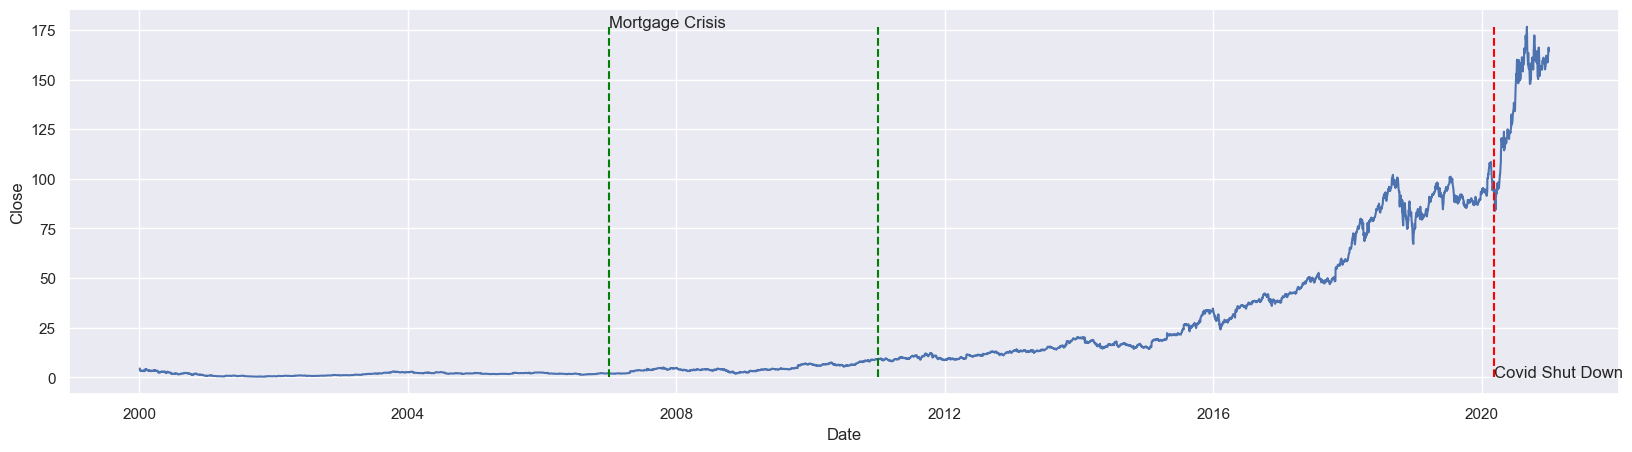

In [17]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Close', data=df)
plt.vlines(pd.Timestamp('2020-03-05'), df.Close.min(), df.Close.max(), color='red', linestyle='dashed')
plt.vlines(pd.Timestamp('2007-01-01'), df.Close.min(), df.Close.max(), color='green', linestyle='dashed')
plt.vlines(pd.Timestamp('2010-12-31'), df.Close.min(), df.Close.max(), color='green', linestyle='dashed')
plt.text(pd.Timestamp('2020-03-05'), df.Close.min(), 'Covid Shut Down')
plt.text(pd.Timestamp('2007-01-01'), df.Close.max(), 'Mortgage Crisis');

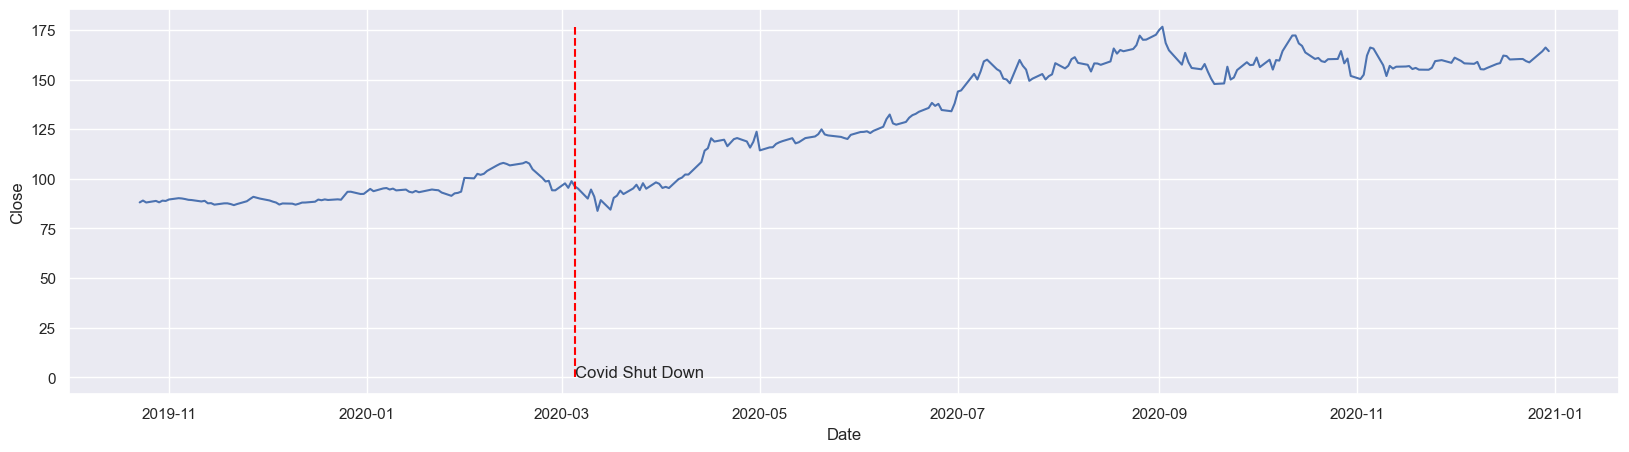

In [18]:
N = 300
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Close', data=df.iloc[-N:,:])
plt.vlines(pd.Timestamp('2020-03-05'), df.Close.min(), df.Close.max(), color='red', linestyle='dashed')
plt.text(pd.Timestamp('2020-03-05'), df.Close.min(), 'Covid Shut Down');

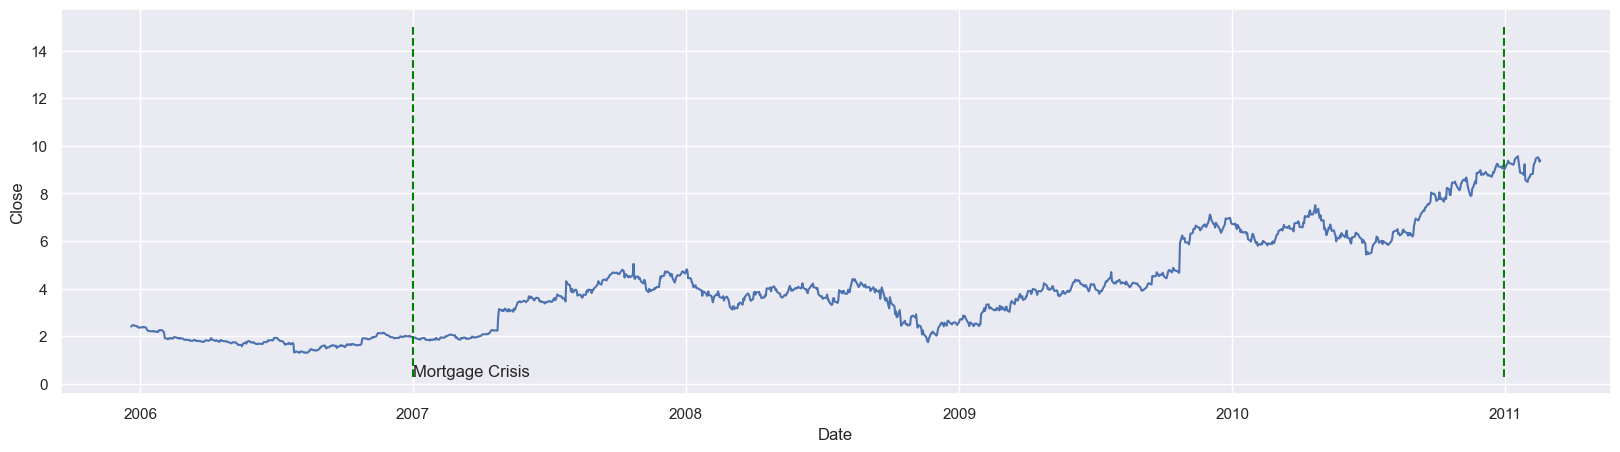

In [19]:
N = 1500
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Close', data=df.iloc[N:N+1300,:])

plt.vlines(pd.Timestamp('2007-01-01'), df.Close.min(), 15, color='green', linestyle='dashed')
plt.vlines(pd.Timestamp('2010-12-31'), df.Close.min(), 15, color='green', linestyle='dashed')

plt.text(pd.Timestamp('2007-01-01'), df.Close.min(), 'Mortgage Crisis');

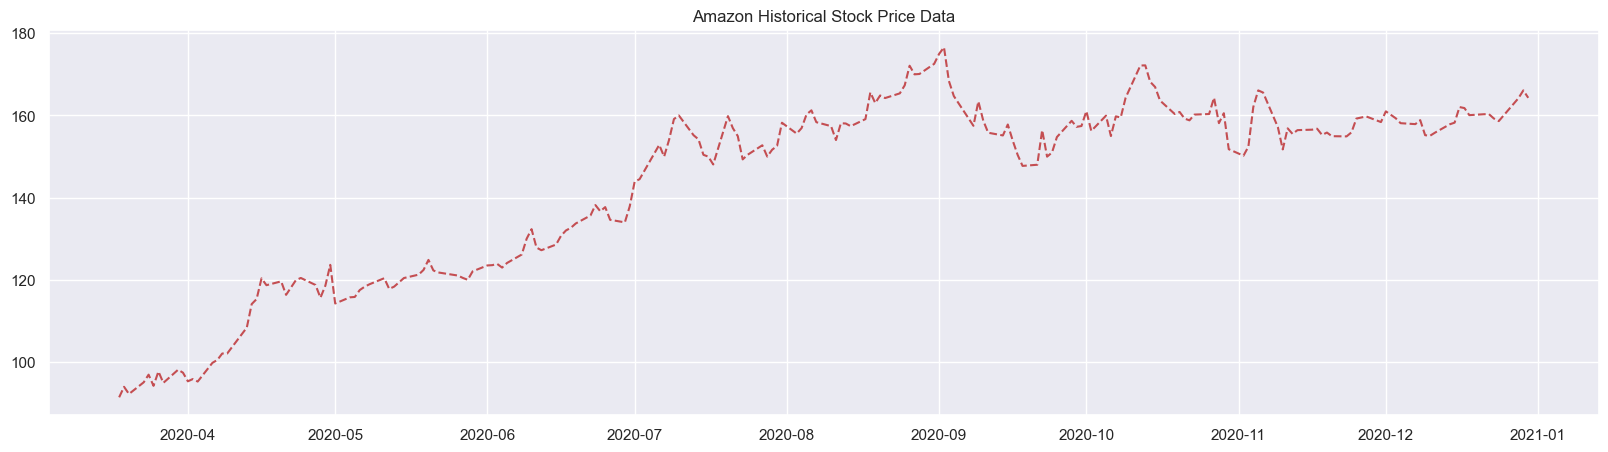

In [20]:
plt.figure(figsize=(20,5))
plt.plot(df.Date[-200:], df.Close[-200:], 'r--')
plt.title('Amazon Historical Stock Price Data');

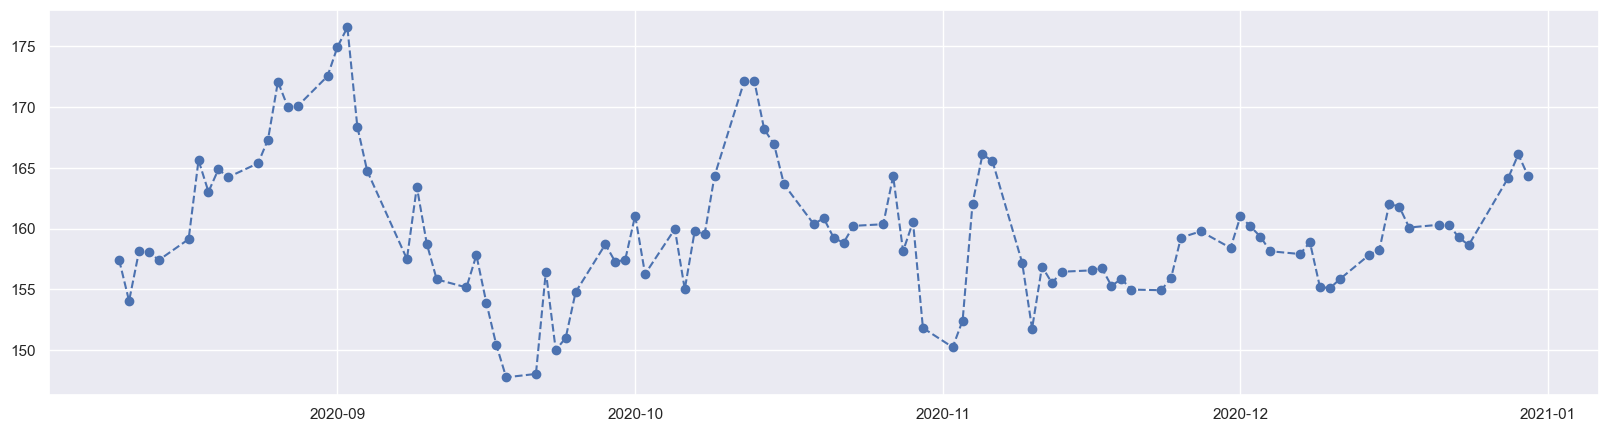

In [21]:
plt.figure(figsize=(20,5))
plt.plot(df.Date[-100:], df.Close[-100:], linestyle='--', marker='o', label='Close');

## Boxplot

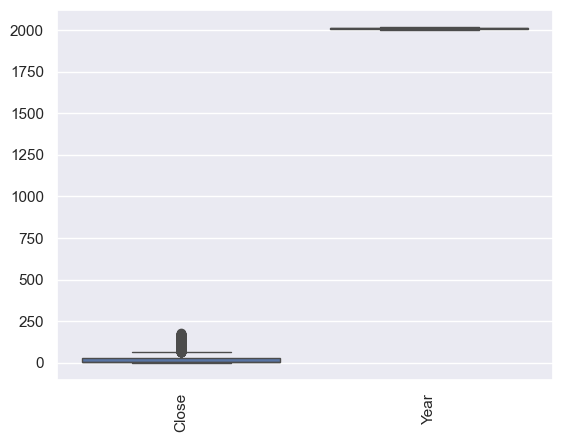

In [22]:
# all columns
sns.boxplot(df)
plt.xticks(rotation=90);

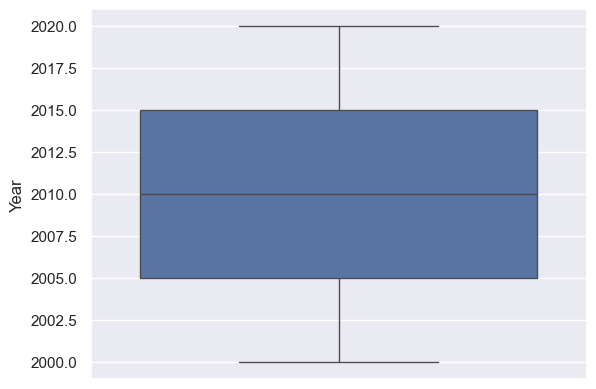

In [25]:
# only Year
sns.boxplot(df['Year']);

- Stock prices have mostly risen over time

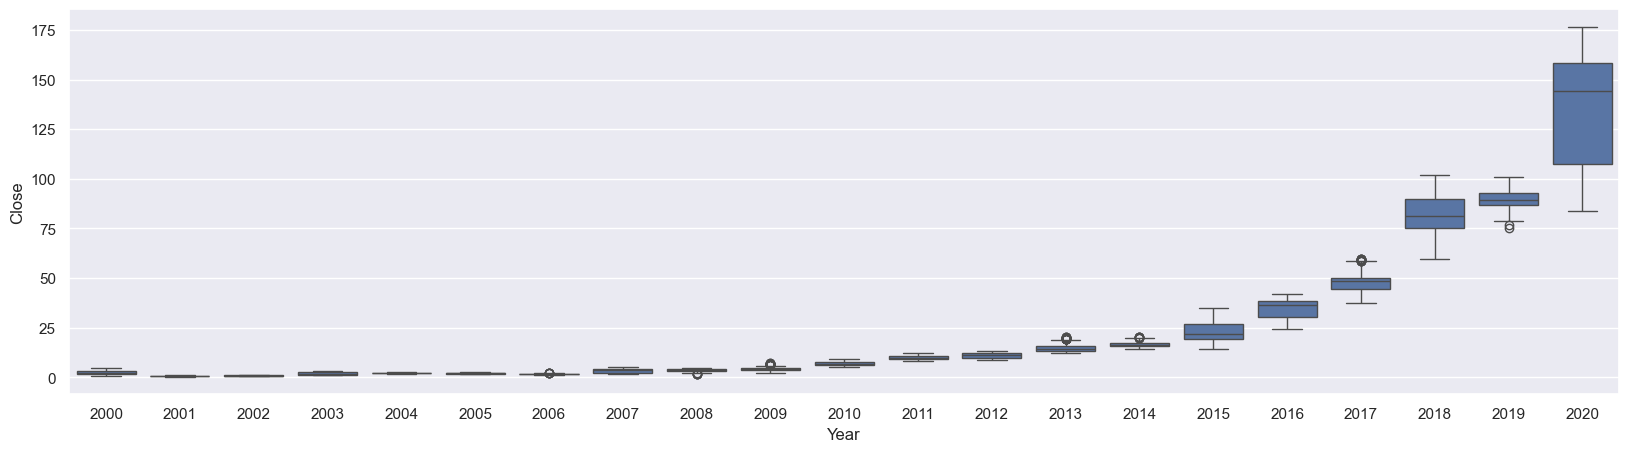

In [30]:
plt.figure(figsize=(20,5))
sns.boxplot(x = 'Year', y='Close', data=df);

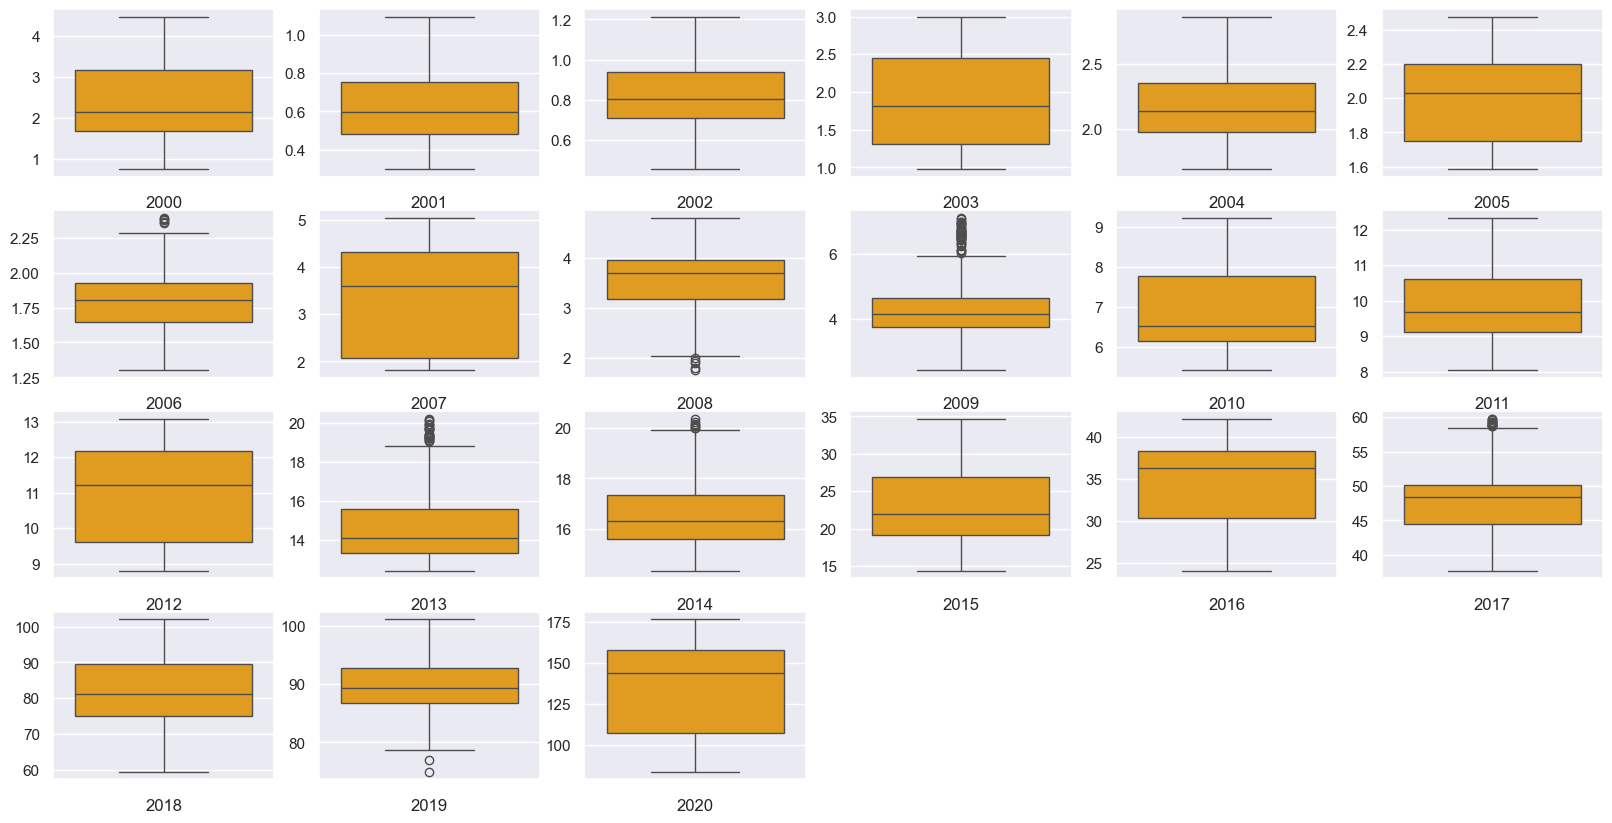

In [24]:
# boxplot for each year
years = np.unique(df.Year.values)
s = 1
plt.figure(figsize=(20,10))
for i in years:
  plt.subplot(4, int(len(years)/4)+1, s)
  sns.boxplot( y=df[df['Year']==i]['Close'], color='orange')
  plt.xlabel(i)
  plt.ylabel(None)
  s += 1

## Percentage Change

In [25]:
df['Pct_Change'] = df.Close.pct_change()
df.head()

,Date,Close,Year,Pct_Change
0,2000-01-03,4.468750,2000,NaN
1,2000-01-04,4.096875,2000,-0.083217
2,2000-01-05,3.487500,2000,-0.148741
3,2000-01-06,3.278125,2000,-0.060036
4,2000-01-07,3.478125,2000,0.061010


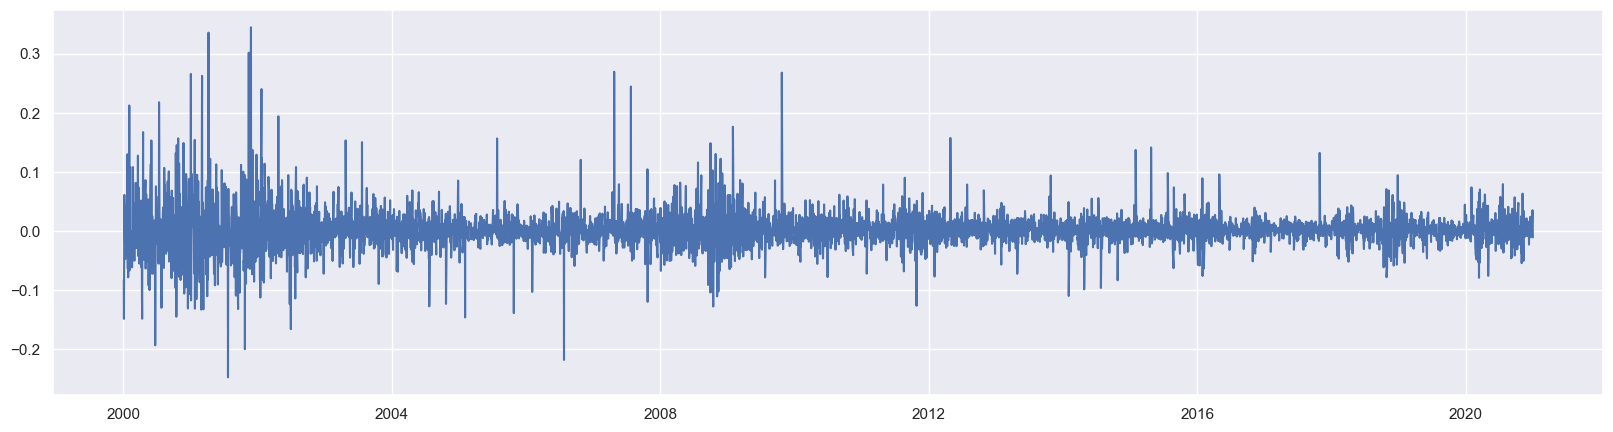

In [26]:
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['Pct_Change']);

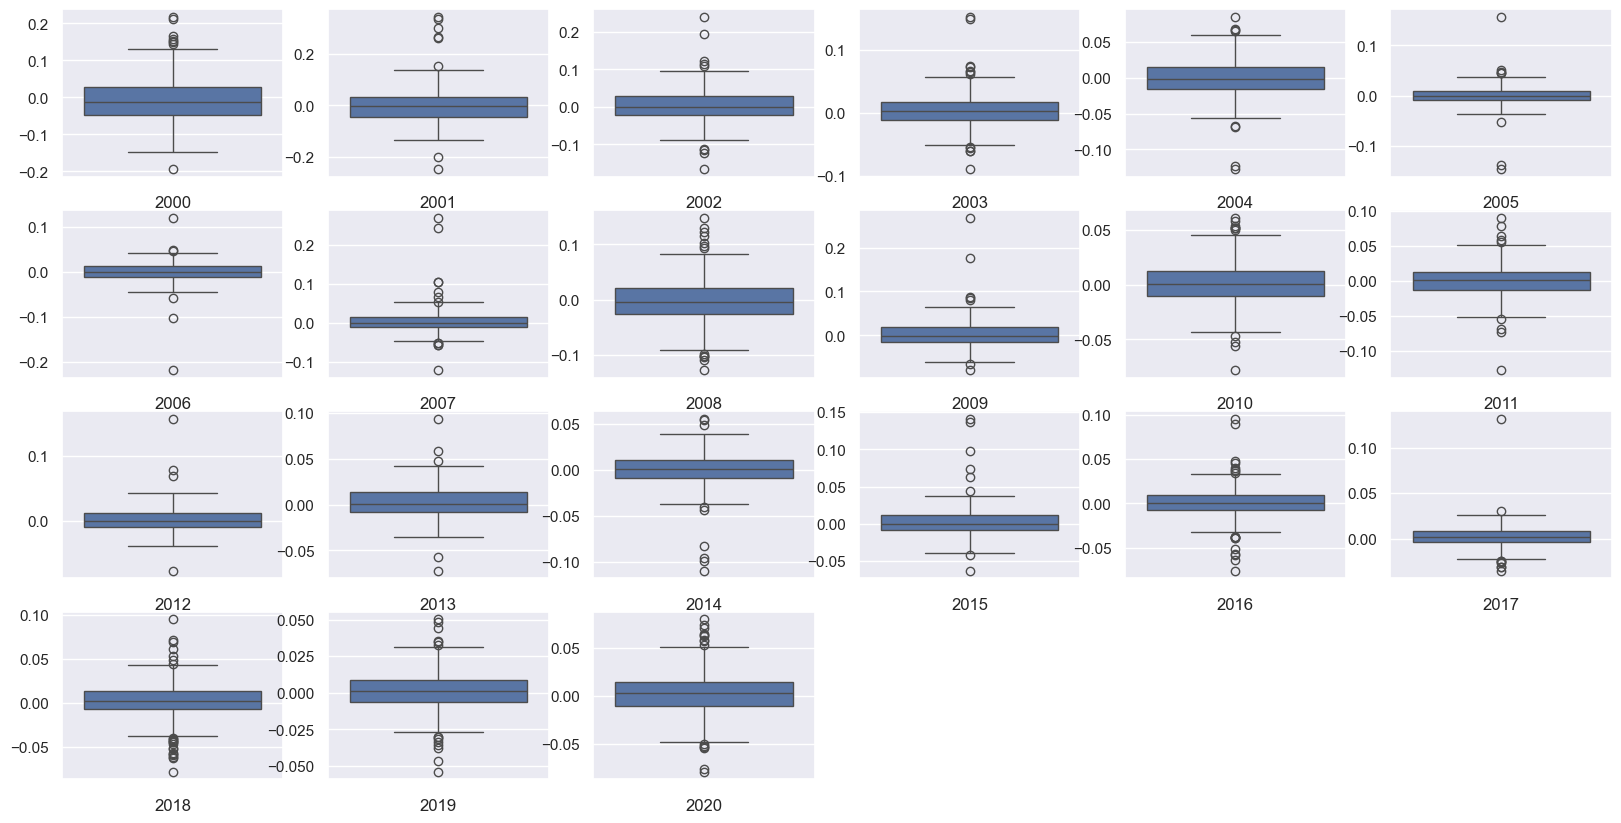

In [27]:
s = 1
plt.figure(figsize=(20,10))
for i in years:
  plt.subplot(4, int(len(years)/4)+1, s)
  sns.boxplot( y=df[df['Year']==i]['Pct_Change'])
  plt.xlabel(i)
  plt.ylabel(None)
  s += 1

## Outlier

In [28]:
q1 = df['Pct_Change'].quantile(0.25)
q3 = df['Pct_Change'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

df[(df['Pct_Change'] >= upper_bound) | (df['Pct_Change'] <= lower_bound)].head()

,Date,Close,Year,Pct_Change
1,2000-01-04,4.096875,2000,-0.083217
2,2000-01-05,3.487500,2000,-0.148741
3,2000-01-06,3.278125,2000,-0.060036
4,2000-01-07,3.478125,2000,0.061010
14,2000-01-24,3.506250,2000,0.129909


In [29]:
df['Date'][0]

Timestamp('2000-01-03 00:00:00')

In [30]:
df['Date'][len(df)-1]

Timestamp('2020-12-30 00:00:00')

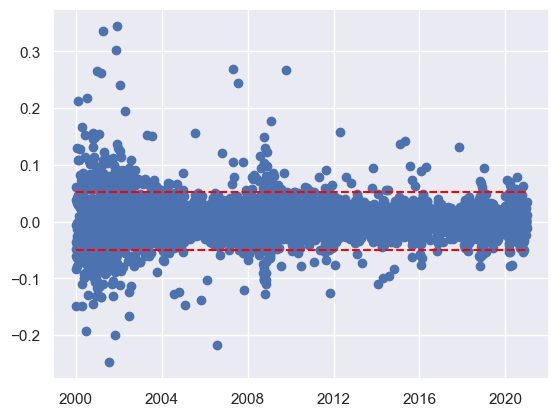

In [31]:
plt.scatter(df['Date'], df['Pct_Change'])
plt.hlines(upper_bound, df['Date'][0],df['Date'][len(df)-1],  color='red', linestyle='dashed')
plt.hlines(lower_bound, df['Date'][0],df['Date'][len(df)-1],  color='red', linestyle='dashed');

## Direction

In [32]:
df['Direction'] = np.where(df.Pct_Change.values>0, 1, -1)
df.head()

,Date,Close,Year,Pct_Change,Direction
0,2000-01-03,4.468750,2000,NaN,-1
1,2000-01-04,4.096875,2000,-0.083217,-1
2,2000-01-05,3.487500,2000,-0.148741,-1
3,2000-01-06,3.278125,2000,-0.060036,-1
4,2000-01-07,3.478125,2000,0.061010,1


In [33]:
df.value_counts('Direction')

Direction
 1    2697
-1    2586
Name: count, dtype: int64

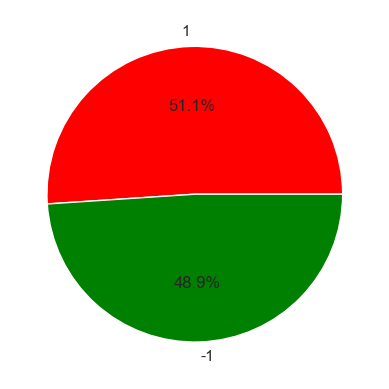

In [34]:
plt.pie(df.value_counts('Direction').values, labels=df.value_counts('Direction').index, autopct='%1.1f%%', colors=['red','green']);

## Moving Average

In [35]:
df['SMA-50'] = df.Close.rolling(50).mean()
df['SMA-100'] = df.Close.rolling(100).mean()
df.head()

,Date,Close,Year,Pct_Change,Direction,SMA-50,SMA-100
0,2000-01-03,4.468750,2000,NaN,-1,NaN,NaN
1,2000-01-04,4.096875,2000,-0.083217,-1,NaN,NaN
2,2000-01-05,3.487500,2000,-0.148741,-1,NaN,NaN
3,2000-01-06,3.278125,2000,-0.060036,-1,NaN,NaN
4,2000-01-07,3.478125,2000,0.061010,1,NaN,NaN


In [36]:
df['EWM-50'] = df.Close.ewm(50).mean()
df['EWM-100'] = df.Close.ewm(100).mean()
df.head()

,Date,Close,Year,Pct_Change,Direction,SMA-50,SMA-100,EWM-50,EWM-100
0,2000-01-03,4.468750,2000,NaN,-1,NaN,NaN,4.468750,4.468750
1,2000-01-04,4.096875,2000,-0.083217,-1,NaN,NaN,4.280972,4.281888
2,2000-01-05,3.487500,2000,-0.148741,-1,NaN,NaN,4.011227,4.014453
3,2000-01-06,3.278125,2000,-0.060036,-1,NaN,NaN,3.822472,3.827614
4,2000-01-07,3.478125,2000,0.061010,1,NaN,NaN,3.750848,3.756318


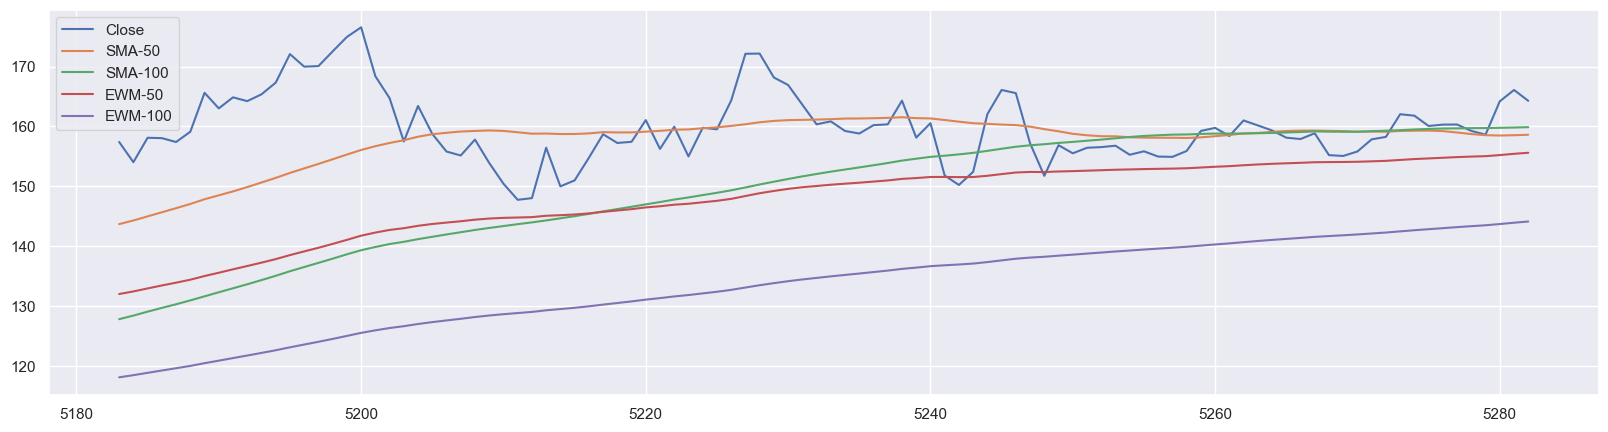

In [37]:
N =100
plt.figure(figsize=(20,5))
plt.plot(df.Close[-N:], label='Close')
plt.plot(df['SMA-50'][-N:], label='SMA-50')
plt.plot(df['SMA-100'][-N:], label='SMA-100')
plt.plot(df['EWM-50'][-N:], label='EWM-50')
plt.plot(df['EWM-100'][-N:], label='EWM-100')
plt.legend();

In [38]:
df.head()

,Date,Close,Year,Pct_Change,Direction,SMA-50,SMA-100,EWM-50,EWM-100
0,2000-01-03,4.468750,2000,NaN,-1,NaN,NaN,4.468750,4.468750
1,2000-01-04,4.096875,2000,-0.083217,-1,NaN,NaN,4.280972,4.281888
2,2000-01-05,3.487500,2000,-0.148741,-1,NaN,NaN,4.011227,4.014453
3,2000-01-06,3.278125,2000,-0.060036,-1,NaN,NaN,3.822472,3.827614
4,2000-01-07,3.478125,2000,0.061010,1,NaN,NaN,3.750848,3.756318


## Histogram

Displays the frequency of instances within each specified value range.

In [39]:
df.shape

(5283, 9)

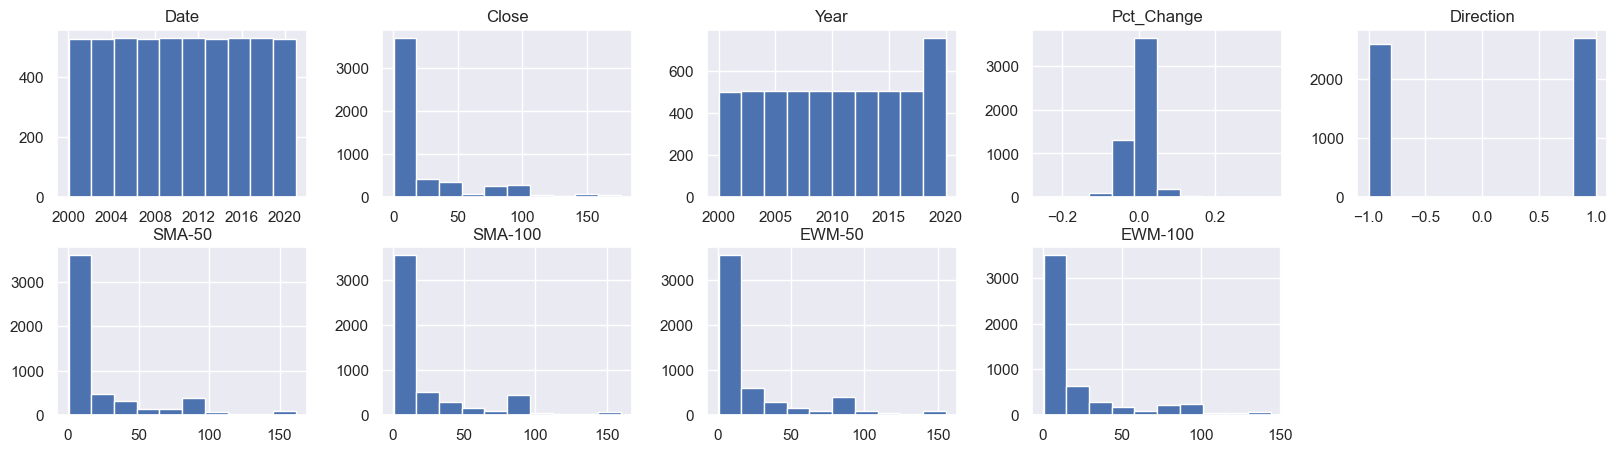

In [40]:
df.hist(layout=(2,5), figsize=(20,5));

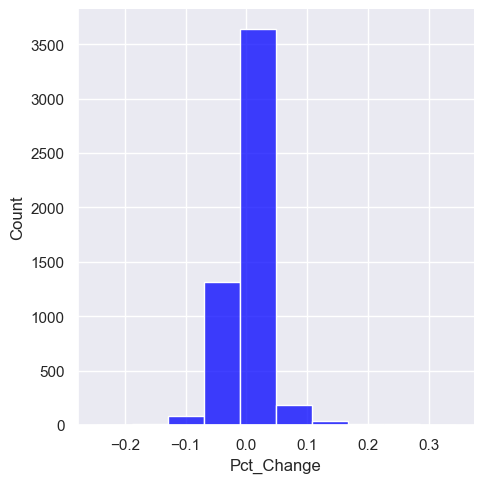

In [41]:
sns.displot(df['Pct_Change'].dropna(),bins=10,color='blue');

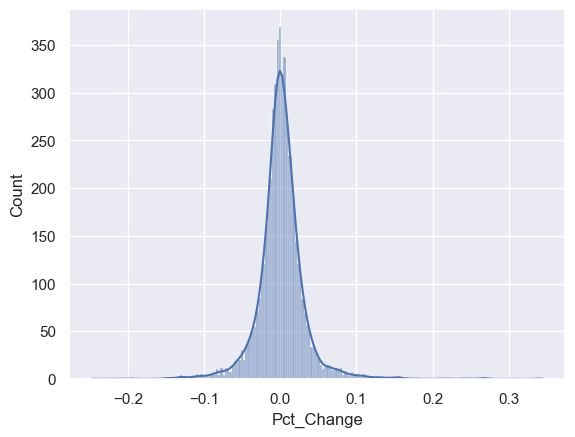

In [42]:
sns.histplot(df['Pct_Change'], kde=True);

## Future Pct Change

In [43]:
df.drop(['Year'], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Close,Pct_Change,Direction,SMA-50,SMA-100,EWM-50,EWM-100
0,2000-05-24,2.428125,0.040161,1,2.945766,3.202320,3.026825,3.112764
1,2000-05-25,2.275000,-0.063063,-1,2.927516,3.180383,3.009776,3.099679
2,2000-05-26,2.325000,0.021978,1,2.907766,3.162664,2.994295,3.087649
3,2000-05-30,2.587500,0.112903,1,2.894703,3.153664,2.985126,3.079926
4,2000-05-31,2.415625,-0.066425,-1,2.878828,3.145039,2.972328,3.069724


In [44]:
df['Pct_Change_Tomorrow'] = df['Pct_Change'].shift(-1)
df.head()

,Date,Close,Pct_Change,Direction,SMA-50,SMA-100,EWM-50,EWM-100,Pct_Change_Tomorrow
0,2000-05-24,2.428125,0.040161,1,2.945766,3.202320,3.026825,3.112764,-0.063063
1,2000-05-25,2.275000,-0.063063,-1,2.927516,3.180383,3.009776,3.099679,0.021978
2,2000-05-26,2.325000,0.021978,1,2.907766,3.162664,2.994295,3.087649,0.112903
3,2000-05-30,2.587500,0.112903,1,2.894703,3.153664,2.985126,3.079926,-0.066425
4,2000-05-31,2.415625,-0.066425,-1,2.878828,3.145039,2.972328,3.069724,0.038810


In [45]:
df['Pct_Change_10_days_later'] = df['Pct_Change'].shift(-10)
df.head()

,Date,Close,Pct_Change,Direction,SMA-50,SMA-100,EWM-50,EWM-100,Pct_Change_Tomorrow,Pct_Change_10_days_later
0,2000-05-24,2.428125,0.040161,1,2.945766,3.202320,3.026825,3.112764,-0.063063,0.001206
1,2000-05-25,2.275000,-0.063063,-1,2.927516,3.180383,3.009776,3.099679,0.021978,0.006024
2,2000-05-26,2.325000,0.021978,1,2.907766,3.162664,2.994295,3.087649,0.112903,-0.071856
3,2000-05-30,2.587500,0.112903,1,2.894703,3.153664,2.985126,3.079926,-0.066425,0.011613
4,2000-05-31,2.415625,-0.066425,-1,2.878828,3.145039,2.972328,3.069724,0.038810,-0.052296


## Correlation:
The correlation coefficient ranges from -1 to +1.
- It assesses the linear relationship between two columns.
- When the scatter plot closely resembles a line with a positive slope, the correlation coefficient approaches one.
- Conversely, when the scatter plot closely resembles a line with a negative slope, the correlation coefficient approaches minus one.
- A correlation coefficient close to zero suggests that the scatter plot doesn't closely align with any particular line.

In [46]:
stock_list = ['AMZN','TSLA', 'ALL', 'GOOGL', 'AEP']
dfS = pd.DataFrame(columns=stock_list)
for i in stock_list:
  dfS[i] = yf.Ticker(i).history(start='2000-01-01', end='2020-12-31')['Close']

In [47]:
dfS.head()

,AMZN,TSLA,ALL,GOOGL,AEP
Date,,,,,
2000-01-03 00:00:00-05:00,4.468750,NaN,13.042857,NaN,10.878959
2000-01-04 00:00:00-05:00,4.096875,NaN,12.626595,NaN,11.008721
2000-01-05 00:00:00-05:00,3.487500,NaN,13.181607,NaN,11.419655
2000-01-06 00:00:00-05:00,3.278125,NaN,13.112235,NaN,11.484538
2000-01-07 00:00:00-05:00,3.478125,NaN,13.597870,NaN,11.635942


In [48]:
dfS.dropna(inplace=True)
dfS.reset_index(inplace=True)
dfS.Date = pd.to_datetime(dfS.Date.dt.date)
dfS.head()

,Date,AMZN,TSLA,ALL,GOOGL,AEP
0,2010-06-29,5.4305,1.592667,21.335146,11.367868,19.264561
1,2010-06-30,5.4630,1.588667,21.129227,11.134885,19.034729
2,2010-07-01,5.5480,1.464000,20.879181,10.998248,18.987587
3,2010-07-02,5.4570,1.280000,20.798277,10.924675,19.087763
4,2010-07-06,5.5030,1.074000,20.540871,10.912663,19.600460


In [55]:
dfS.corr()

,Date,AMZN,TSLA,ALL,GOOGL,AEP
Date,1.000000,0.895117,0.601291,0.971000,0.969696,0.973419
AMZN,0.895117,1.000000,0.778974,0.851259,0.953533,0.890632
TSLA,0.601291,0.778974,1.000000,0.528240,0.705471,0.574317
ALL,0.971000,0.851259,0.528240,1.000000,0.950193,0.965794
GOOGL,0.969696,0.953533,0.705471,0.950193,1.000000,0.957103
AEP,0.973419,0.890632,0.574317,0.965794,0.957103,1.000000


In [57]:
# AMZN vs others
# descending order
dfS.corr()['AMZN'].sort_values(ascending=False)

AMZN     1.000000
GOOGL    0.953533
Date     0.895117
AEP      0.890632
ALL      0.851259
TSLA     0.778974
Name: AMZN, dtype: float64

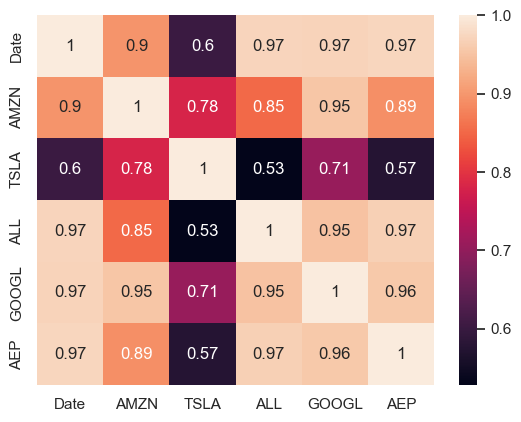

In [49]:
sns.heatmap(dfS.corr(), annot=True);

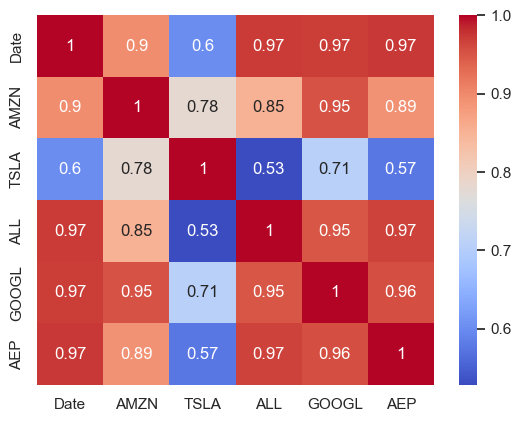

In [50]:
sns.heatmap(dfS.corr(), annot=True, cmap='coolwarm');

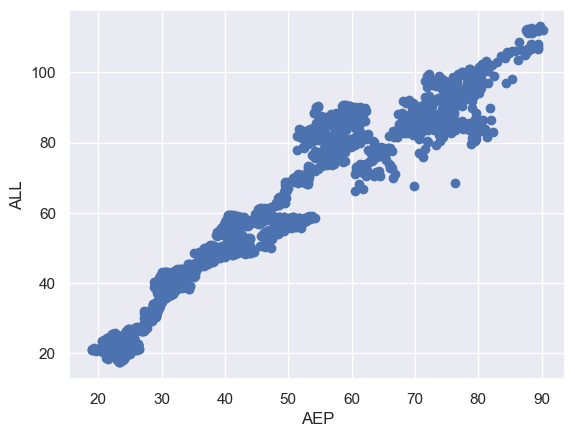

In [51]:
plt.scatter(dfS.AEP, dfS.ALL)
plt.xlabel('AEP')
plt.ylabel('ALL');

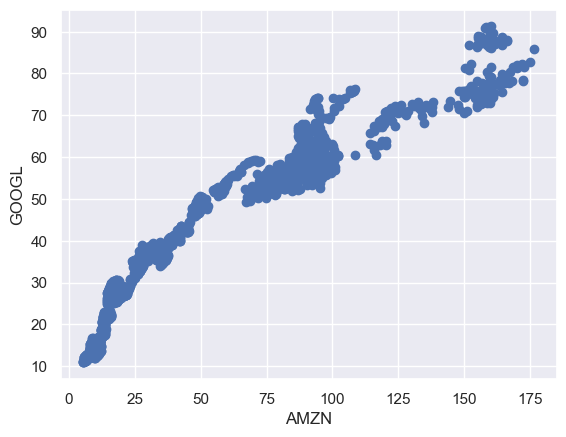

In [52]:
plt.scatter(dfS.AMZN, dfS.GOOGL)
plt.xlabel('AMZN')
plt.ylabel('GOOGL');

## Pairplot

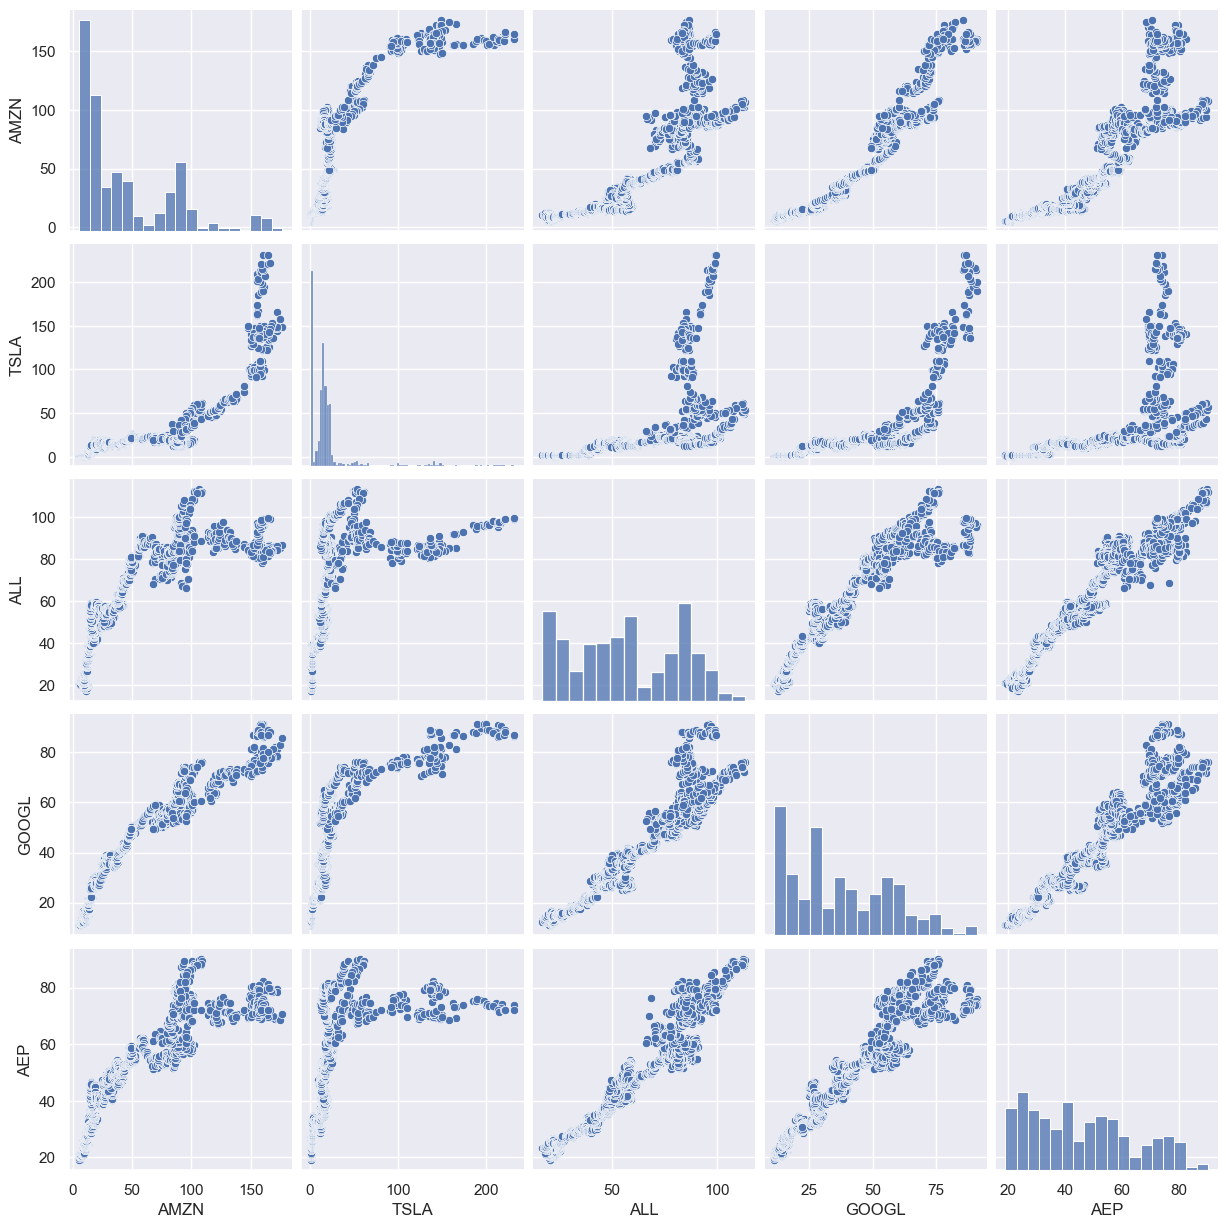

In [54]:
sns.pairplot(dfS);

## Change in a day

In [45]:
df2 = amazon[['Date', 'Low', 'High','Open', 'Close']].copy()
df2.head()

,Date,Low,High,Open,Close
0,2000-01-03,3.952344,4.478125,4.075000,4.468750
1,2000-01-04,4.087500,4.575000,4.268750,4.096875
2,2000-01-05,3.400000,3.756250,3.525000,3.487500
3,2000-01-06,3.200000,3.634375,3.565625,3.278125
4,2000-01-07,3.309375,3.525000,3.350000,3.478125


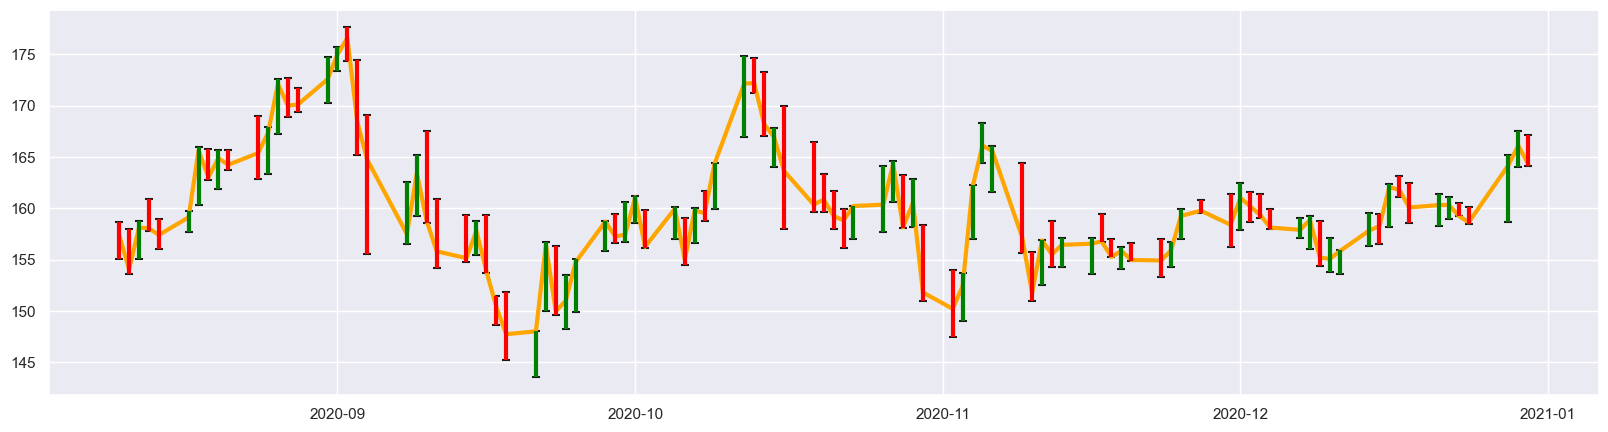

In [46]:
N = 100
plt.figure(figsize=(20,5))

plt.plot(df2.Date[-N:], df2.Close[-N:], linewidth=3, color='orange')
plt.scatter(df2.Date[-N:], df2.Low[-N:], c='k', s=40, marker='_')
plt.scatter(df2.Date[-N:], df2.High[-N:], c='k', s=40, marker='_')

for i in range(1, N+1):
  if df2.Open[len(df2)-i] > df2.Close[len(df2)-i]:
    col ='red'
  elif df2.Open[len(df2)-i] < df2.Close[len(df2)-i]:
    col='green'
  else:
    col='gray'

  plt.vlines(df2.Date[len(df2)-i], df2.Low[len(df2)-i], df2.High[len(df2)-i], color=col, linewidth=3 )


## Resample

In [47]:
dfRS = df[['Date', 'Close']].copy()
dfRS.set_index('Date', inplace=True)
dfRS.resample(rule='Y').max().head()

,Close
Date,
2000-12-31,2.89375
2001-12-31,1.09375
2002-12-31,1.21250
2003-12-31,2.99550
2004-12-31,2.85900


In [56]:
dfRS = df[['Date', 'Close']].copy()
dfRS.set_index('Date', inplace=True)
dfRS.resample(rule='QS').max().head()

,Close
Date,
2000-04-01,2.89375
2000-07-01,2.29375
2000-10-01,1.98750
2001-01-01,1.09375
2001-04-01,0.87800


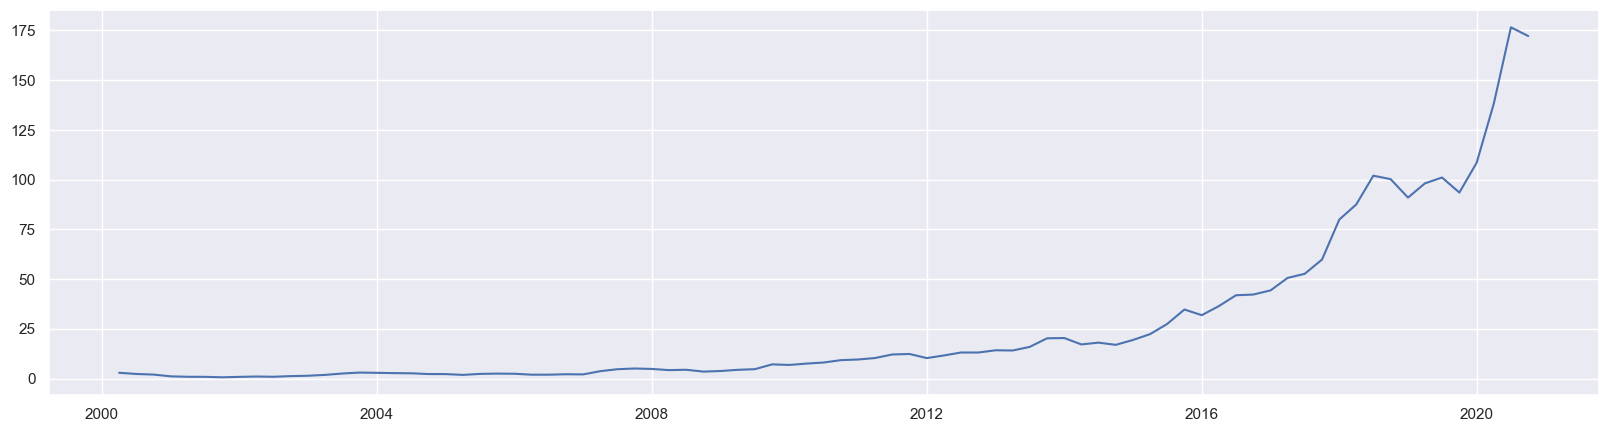

In [48]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
plt.figure(figsize=(20,5))
plt.plot(dfRS.resample(rule='QS').max());

In [49]:
dfRS.resample(rule='Y').max().head()

,Close
Date,
2000-12-31,2.89375
2001-12-31,1.09375
2002-12-31,1.21250
2003-12-31,2.99550
2004-12-31,2.85900


In [50]:
val = dfRS.resample(rule='Y').mean().values.flatten()
val

array([  1.75503473,   0.61002129,   0.82420635,   1.88706945,
         2.17826191,   1.99485516,   1.79546614,   3.3614741 ,
         3.49400197,   4.36409127,   6.95701984,   9.83360118,
        11.015182  ,  14.9015794 ,  16.62755161,  23.90691464,
        34.97615664,  48.40835056,  82.08630853,  89.45946024,
       133.92845396])

In [51]:
years = dfRS.resample(rule='Y').max().index
years

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

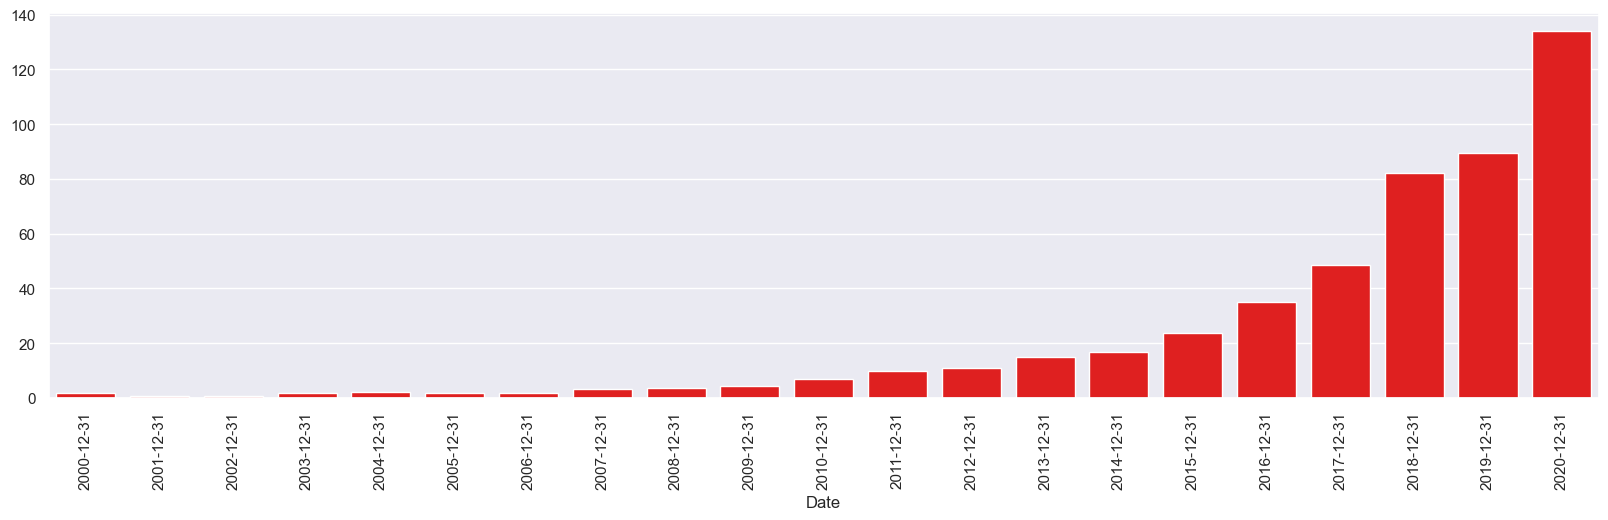

In [52]:
plt.figure(figsize=(20,5))
sns.barplot(x=years, y=val, color='red' )
plt.xticks(rotation=90);

In [53]:
str_years = [i.strftime('%Y/%m/%d') for i in years]
str_years[:5]

['2000/12/31', '2001/12/31', '2002/12/31', '2003/12/31', '2004/12/31']

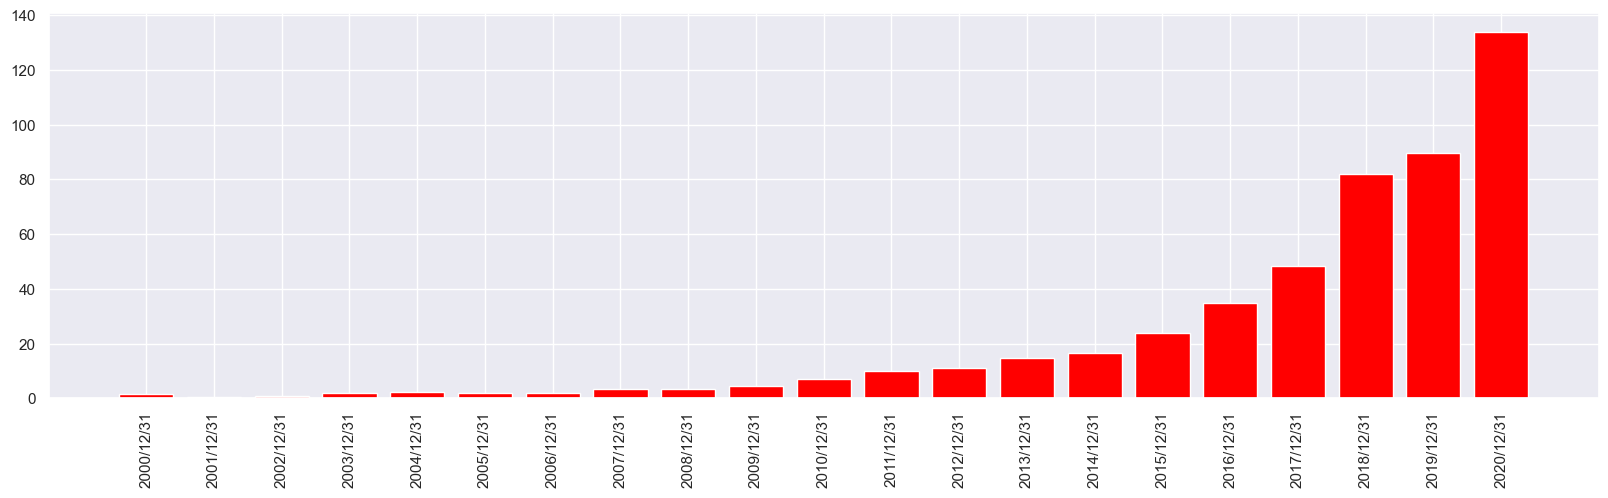

In [54]:
plt.figure(figsize=(20,5))
plt.bar(str_years, val, color='red' )
plt.xticks(rotation=90);

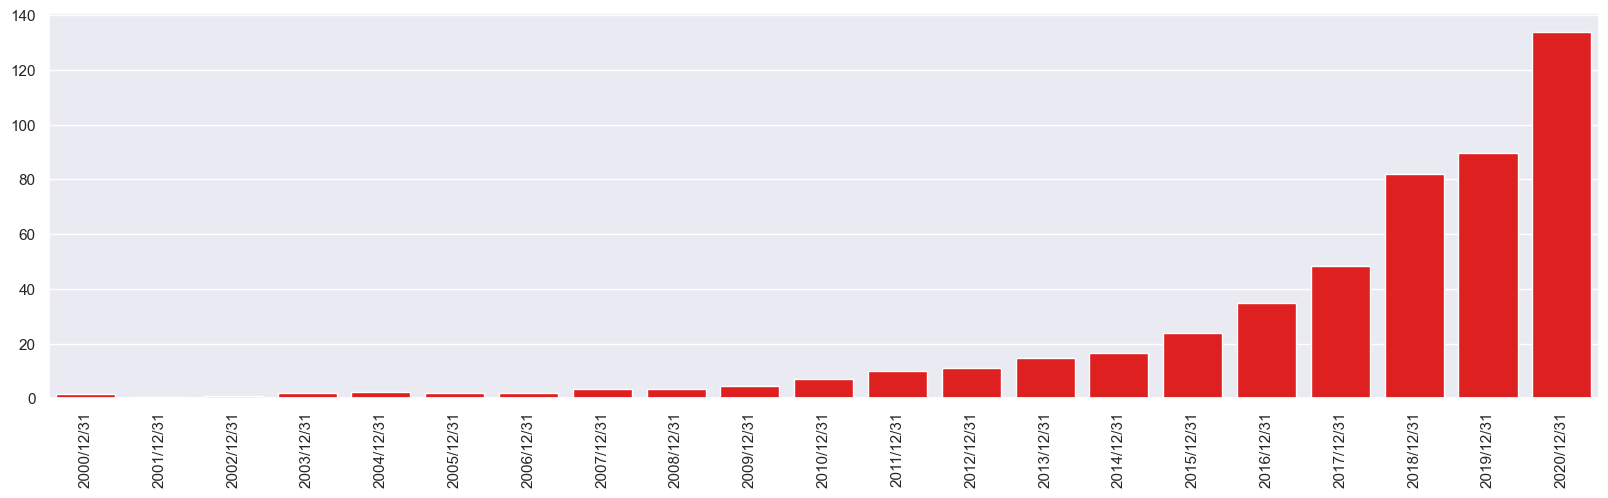

In [55]:
plt.figure(figsize=(20,5))
sns.barplot(x=str_years, y=val, color='red' )
plt.xticks(rotation=90);